<a href="https://colab.research.google.com/github/rara-by/code/blob/Tweaking/Copy_of_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## An introduction to Linear Regression

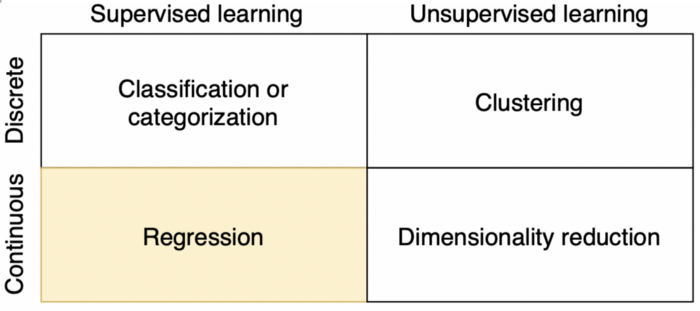
<br> [image source](https://towardsdatascience.com/introduction-to-regression-analysis-9151d8ac14b3)

Regression analysis is defined in Wikipedia as: <br><br>
_In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the ‘outcome variable’) and one or more independent variables (often called ‘predictors’, ‘covariates’, or ‘features’)._
<br><br>
The dependent variable is the variable we want to predict. <br>
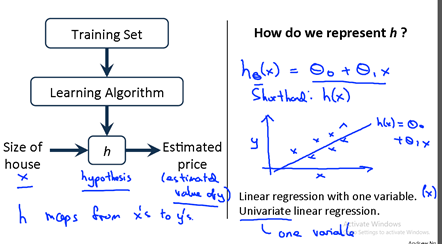 <br>
Source: Machine Learning MOOC (coursera)

### Regression vs Classification

"Fundamentally, classification is about predicting a label and regression is about predicting a quantity."




## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**

In [ ]:
from sklearn import datasets

### **Load dataset**

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

### **Description of the Diabetes dataset**

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### **Feature names**

In [ ]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [ ]:
X = diabetes.data
Y = diabetes.target

In [ ]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [ ]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [ ]:
X.shape, Y.shape

((442, 10), (442,))

## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```

For your convenience, I have also shared the [Boston Housing dataset](https://github.com/dataprofessor/data/blob/master/BostonHousing.csv) on the Data Professor GitHub package.

### **Import library**

In [ ]:
import pandas as pd

### **Download CSV from GitHub**

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2021-02-21 15:29:41--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2021-02-21 15:29:41--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.003s  

2021-02-21 15:29:42 (10.1 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



### **Read in CSV file**

In [ ]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **Split dataset to X and Y variables**

In [ ]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## **Data split**

### **Import library**

In [ ]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [ ]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [ ]:
X_test.shape, Y_test.shape

((102, 13), (102,))

## **Linear Regression Model**

### **Import library**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

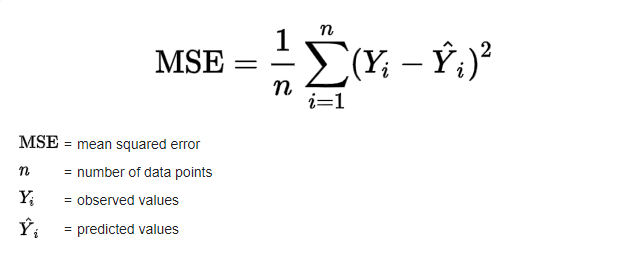 <br>

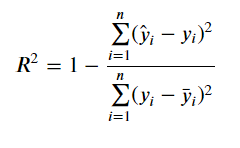
<br>
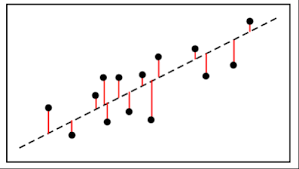
<br>


### **Build linear regression**

#### Defines the regression model

In [ ]:
model = linear_model.LinearRegression()

#### Build training model

In [ ]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Apply trained model to make prediction (on test set)

In [ ]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred)) # goal is to minimize this
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred)) #measure of how close the prediction is to target values, so goal - maximize

Coefficients: [-1.18748677e-01  4.66085662e-02  1.52317598e-02  3.56598374e+00
 -1.97798890e+01  4.06403251e+00 -8.99249541e-04 -1.62484950e+00
  3.51716838e-01 -1.35209353e-02 -9.09579857e-01  9.68328156e-03
 -5.08599366e-01]
Intercept: 35.78449236284719
Mean squared error (MSE): 16.80
Coefficient of determination (R^2): 0.76


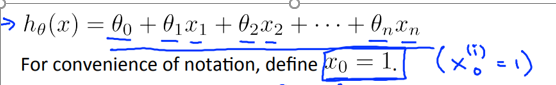
<br> Source: Machine Learning MOOC

### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [ ]:
r2_score(Y_test, Y_pred)

0.7638907191959313

In [ ]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

We will be using the modulo operator to format the numbers by rounding it off.

In [ ]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [ ]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [ ]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [ ]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [ ]:
Y_test

383    12.3
19     18.2
353    30.1
492    20.1
107    20.4
       ... 
217    28.7
479    21.4
497    18.3
38     24.7
276    33.2
Name: medv, Length: 102, dtype: float64

In [ ]:
import numpy as np
np.array(Y_test)

array([12.3, 18.2, 30.1, 20.1, 20.4, 26.7, 20. , 19. , 24.2, 35.2, 25.3,
       31. , 19.7, 21.9, 20. , 45.4, 29.9, 19.1,  7.2, 13.1, 21.7, 22. ,
       10.2, 23.1, 21.7, 19.9, 27.5, 25. , 21.6, 14.3,  9.7, 17.8, 10.2,
       15.6, 35.4, 50. , 24.1, 23.1, 22. ,  7. , 21.8, 13.1, 20.1, 19.9,
        6.3, 23.9, 29.4, 50. , 22.6, 19.8, 21.8, 15.6, 17.4, 23.2, 22. ,
       16. , 20.6, 20.8, 26.4, 24.8, 16.8, 32.2, 10.4, 27.9, 22.6, 21.4,
       21.7, 32. , 28.6, 28.5, 20.6, 33.1, 22.4, 20.2, 31.5, 20.3, 21.4,
       13.5, 19.1, 23.7, 41.7, 15.4,  8.5, 14.2, 12.7, 21.9, 15. ,  5. ,
       15.7, 23.1,  7.4, 19.6,  8.4, 24.4, 36.4, 19.4, 20.4, 28.7, 21.4,
       18.3, 24.7, 33.2])

In [ ]:
Y_pred

array([13.53248834, 18.42762734, 24.70630697, 15.52401924, 21.13316062,
       34.58422076, 18.8010848 , 21.37960084, 25.36849432, 36.85858031,
       25.16164112, 34.64836993, 21.10513568, 39.32991623, 17.96276574,
       39.22059594, 31.7526171 , 17.594779  , 18.36405531, 12.671827  ,
       25.13294378, 22.04784815,  6.77253729, 17.0261314 , 24.28454492,
       19.20772234, 24.95296272, 29.27775154, 25.00112408, 14.00807812,
       10.18787234, 23.13695483, 16.79818338, 13.11124774, 34.51427599,
       37.32315794, 19.77274255, 25.00935665, 26.34193586,  7.85264246,
       20.70994087, 20.874307  , 21.74877571, 19.21943343, 11.54450298,
       25.71116529, 30.96670261, 45.7719916 , 19.41543516, 18.32521589,
       21.49209993, 11.55105093, 22.25197833, 17.76603018, 20.94161788,
       18.50210329, 15.95543188, 18.24710737, 29.01685041, 26.15138147,
       21.33838891, 31.43672384,  7.09472012, 32.14755579, 27.33252751,
       22.657066  , 21.82419842, 33.61866512, 28.36465565, 33.77

#### Making the scatter plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


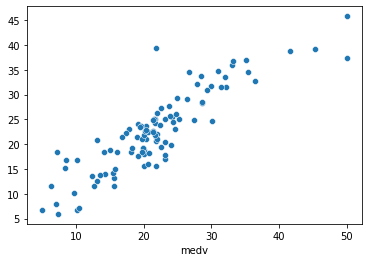

In [ ]:
sns.scatterplot(Y_test, Y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


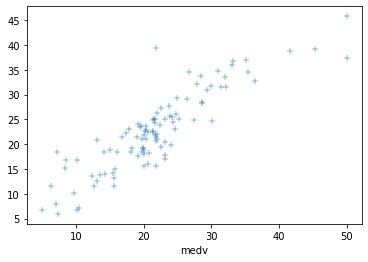

In [ ]:
sns.scatterplot(Y_test, Y_pred, marker="+")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


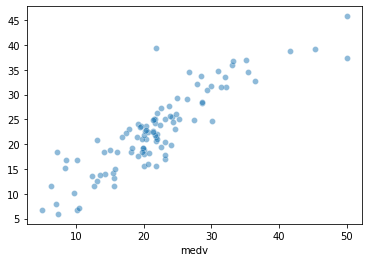

In [ ]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)